### StarAgile Machine Learning Level-2 Assignment 3 (Multiclass Classification)
### Assignment Submitted by VINAY.M on 14-09-2023

- Perform EDA and build a model to classify fashion accessories
- Perform data cleaning
- Check Whether the classes are balanced or not
- Normalize the images
- Perform data preprocessing
- Train the model using several classification models and find the best model suitable for the problem
- Use hyperparameter tuning to find best parameters for the algorithm
- Evaluate the model using various classification evaluation metrics

Dataset Link : https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dfTrain = pd.read_csv('fashion-mnist_train.csv')
dfTest = pd.read_csv('fashion-mnist_test.csv')

In [6]:
# Data Dictionary

In [7]:
dfTrain

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Creating Label Dictionary

In [10]:
dfTrain["label"].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [74]:
labels_dict = {
    0: "T-shirt-top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

In [75]:
labels_dict

{0: 'T-shirt-top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [13]:
# Splitting X train, y train, X Test, y Test

In [14]:
X_train = dfTrain.iloc[:,1:] #all pixels

y_train = dfTrain.iloc[:,0] #labels

X_test=  dfTest.iloc[:,1:] #all pixels

y_test= dfTest.iloc[:,0] #labels

In [15]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [17]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
y_test

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64

In [19]:
# Preprocessing X_Test and X_Train from 0 to 255 to 0 to 1 for better learning 
X_Train_scaled = np.array(X_train/255, dtype = 'float32')
X_Test_scaled = np.array(X_test/255, dtype='float32')

In [20]:
X_Train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_Test_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

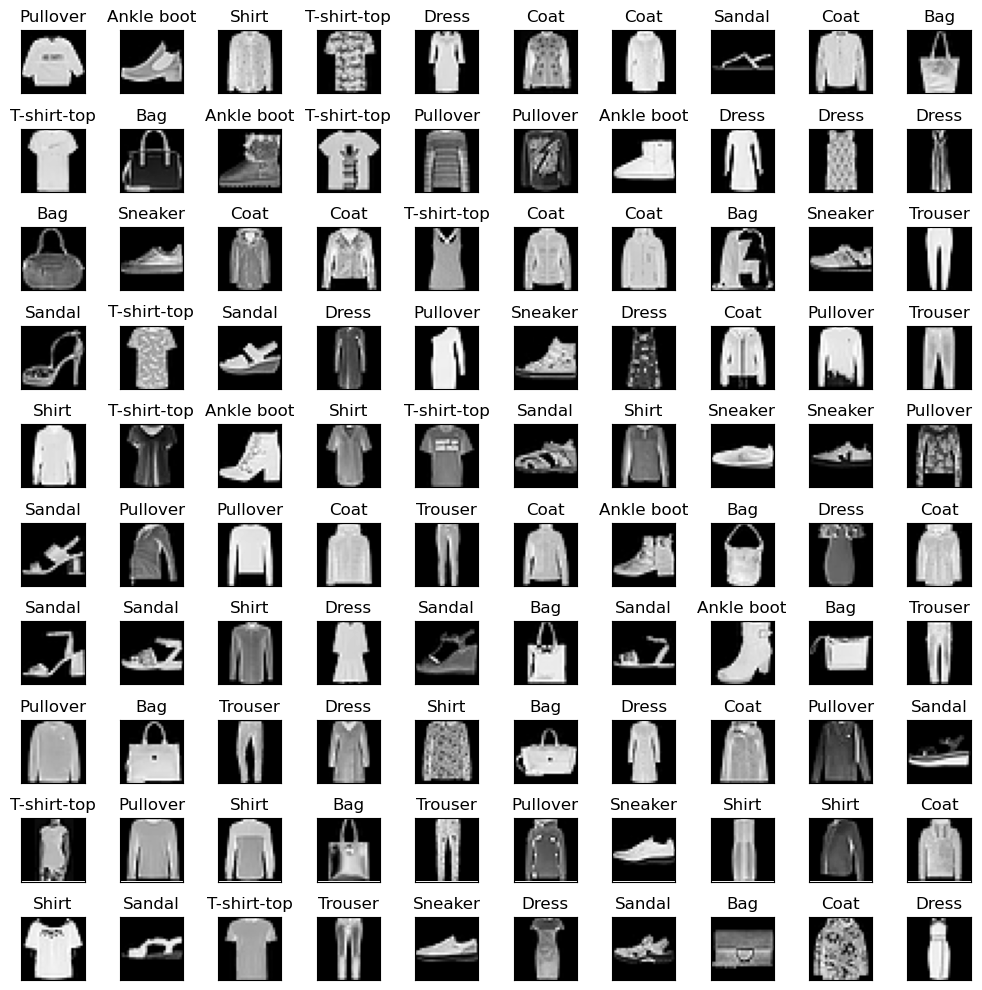

In [76]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Convert the Pandas Series to a NumPy array and then reshape
    image = X_train.iloc[i].to_numpy().reshape((28, 28))

    label_index = int(y_train.iloc[i])
    plt.imshow(image, cmap='gray')  # Assuming the data is grayscale

    # Get the class name from the dictionary
    labels = labels_dict[label_index]
    plt.title(labels)
plt.tight_layout()
plt.show()

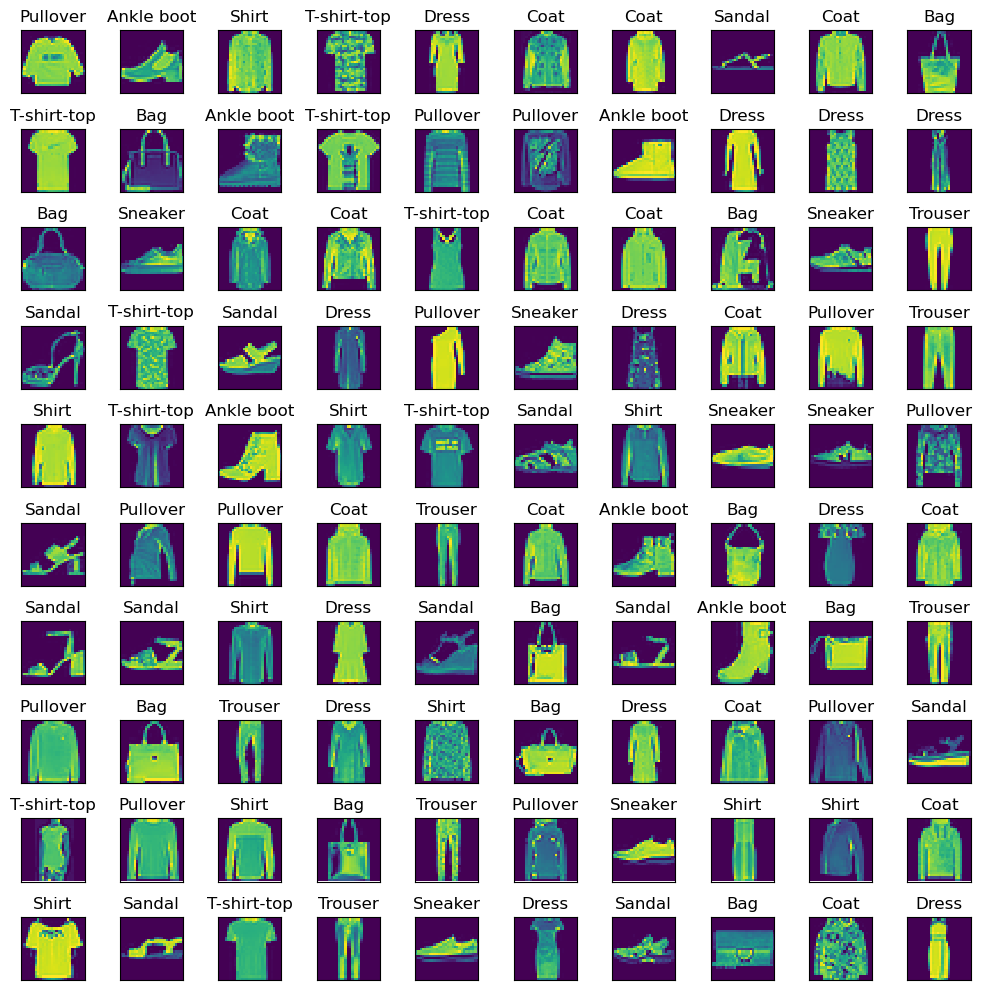

In [77]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = X_train.iloc[i].to_numpy().reshape((28, 28))

    label_index = int(y_train.iloc[i])
    plt.imshow(image, cmap='viridis', interpolation='nearest')

    # Get the class name from the dictionary
    labels = labels_dict[label_index]
    plt.title(labels)
plt.tight_layout()
plt.show()

In [28]:
# Reshaping all images
X_train_final = X_Train_scaled.reshape(-1, 28, 28, 1) #28x28 is image shape, 1 is band
X_test_final = X_Test_scaled.reshape(-1, 28, 28, 1)

In [29]:
X_train_final

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [30]:
X_test_final

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01568628],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00392157],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [31]:
X_train_final.shape

(60000, 28, 28, 1)

In [32]:
X_test_final.shape

(10000, 28, 28, 1)

In [35]:
y_train.shape

(60000,)

In [36]:
y_test.shape

(10000,)

In [50]:
# Splitting Data Train and validate
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(X_train_final, y_train, test_size = 0.1, random_state = 42)

In [52]:
print(x_tr.shape)
print(y_tr.shape)
print(X_test_final.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(54000, 28, 28, 1)
(54000,)
(10000, 28, 28, 1)
(10000,)
(6000, 28, 28, 1)
(6000,)


In [37]:
#CNN Modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [44]:
model = Sequential()

# Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(28, 28, 1)))

# MaxPooling2D layer
model.add(MaxPooling2D(pool_size= 2))

# Dropout randomly disable 20% of the neurons which helps to prevent overfitting by reducing co-adaptation between neurons
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Dense layer with 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

# 20 classes with softmax activation
model.add(Dense(10, activation='softmax'))

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                173088    
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                      

In [68]:
import tensorflow as tf

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_tr, y_tr, epochs=30, verbose=1, validation_data=(x_val, y_val))


Epoch 1/30
1688/1688 [==============================] - 37s 22ms/step - loss: 0.4328 - accuracy: 0.8462 - val_loss: 0.3339 - val_accuracy: 0.8817
Epoch 2/30
1688/1688 [==============================] - 38s 22ms/step - loss: 0.3110 - accuracy: 0.8884 - val_loss: 0.2936 - val_accuracy: 0.8958
Epoch 3/30
1688/1688 [==============================] - 37s 22ms/step - loss: 0.2759 - accuracy: 0.9012 - val_loss: 0.2687 - val_accuracy: 0.9038
Epoch 4/30
1688/1688 [==============================] - 38s 22ms/step - loss: 0.2508 - accuracy: 0.9089 - val_loss: 0.2636 - val_accuracy: 0.9077
Epoch 5/30
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2316 - accuracy: 0.9146 - val_loss: 0.2490 - val_accuracy: 0.9098
Epoch 6/30
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2158 - accuracy: 0.9211 - val_loss: 0.2369 - val_accuracy: 0.9163
Epoch 7/30
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2026 - accuracy: 0.9251 - val_loss: 0.2624 -

In [78]:
#saving model
from tensorflow.keras.models import load_model

In [80]:
model.save('Fashion_MNIST_classifier.h5')

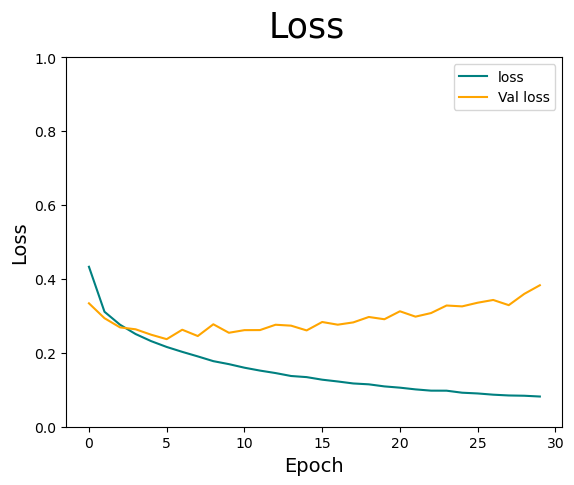

In [86]:
#Plotting the performance - Training Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='Val loss')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
fig.suptitle("Loss", fontsize=25)
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

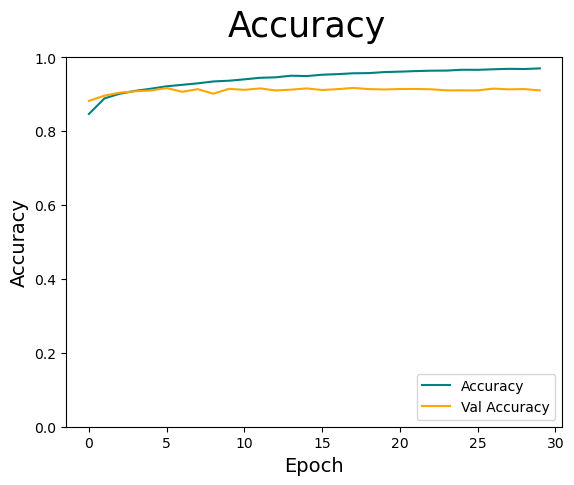

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Val Accuracy')
fig.suptitle("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [89]:
predictions = model.predict(X_test_final)
predicted_classes = predictions.argmax(axis=1)

313/313 [==============================] - 2s 7ms/step


In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(classification_report(predicted_classes, y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1131
           1       0.99      0.98      0.98      1010
           2       0.89      0.85      0.87      1040
           3       0.91      0.93      0.92       979
           4       0.81      0.92      0.86       883
           5       0.97      0.98      0.98       991
           6       0.73      0.78      0.75       937
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1011
           9       0.97      0.95      0.96      1018

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [92]:
# Making Predictions

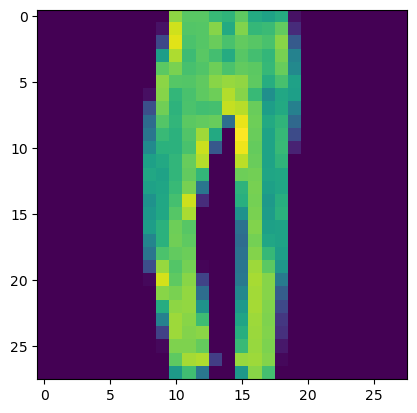

In [96]:
# Randomly picks any data from Tesing Datasets
import random

maxrows = X_test_final.shape[0]

random_row = random.randint(1, maxrows)

test_prediction = X_test_final[random_row]
actual_value = y_test[random_row]

plt.imshow(test_prediction.reshape(28,28))

In [97]:
predictions = model.predict(test_prediction.reshape(-1, 28, 28, 1))
predicted_class = np.argmax(predictions)

print("Predicted class:", predicted_class)
print("Actual class:", actual_value)

1/1 [==============================] - 0s 47ms/step
Predicted class: 1
Actual class: 1


In [98]:
# Encoding output to dictionary values

In [100]:
labels_dict

{0: 'T-shirt-top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [101]:
predictions = model.predict(test_prediction.reshape(-1, 28, 28, 1))
predicted_class = np.argmax(predictions)

print("Predicted class:", labels_dict[predicted_class])
print("Actual class:", labels_dict[actual_value])

1/1 [==============================] - 0s 58ms/step
Predicted class: Trouser
Actual class: Trouser


1/1 [==============================] - 0s 32ms/step


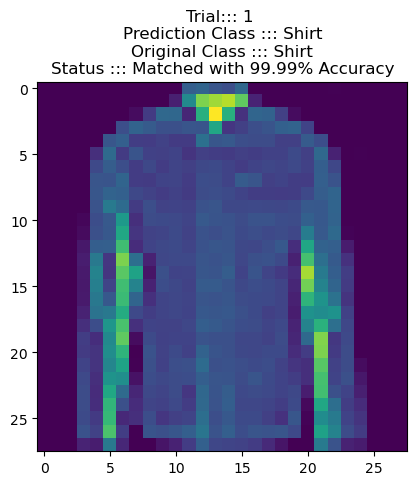

1/1 [==============================] - 0s 33ms/step


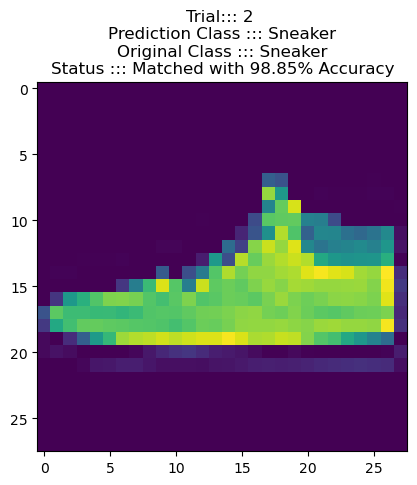

1/1 [==============================] - 0s 34ms/step


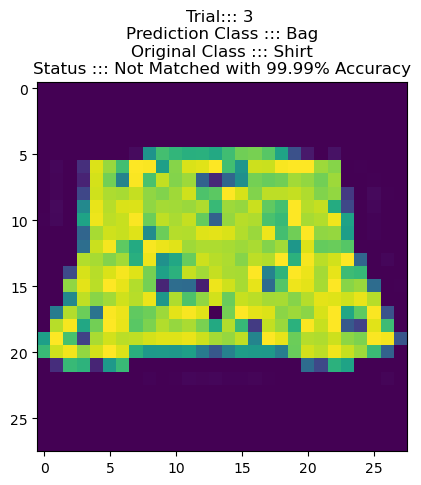

1/1 [==============================] - 0s 37ms/step


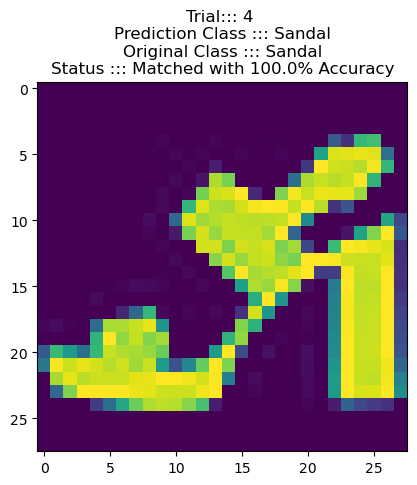

1/1 [==============================] - 0s 42ms/step


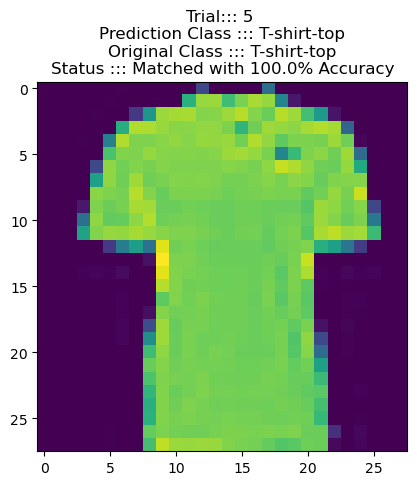

1/1 [==============================] - 0s 36ms/step


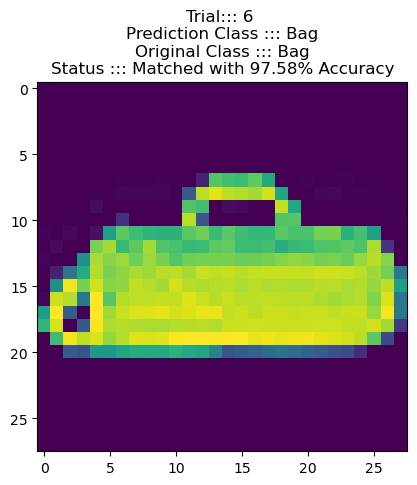

1/1 [==============================] - 0s 34ms/step


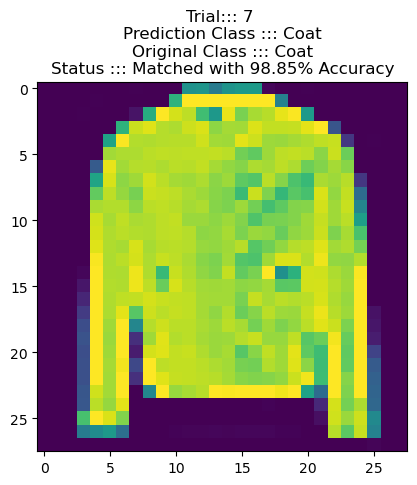

1/1 [==============================] - 0s 38ms/step


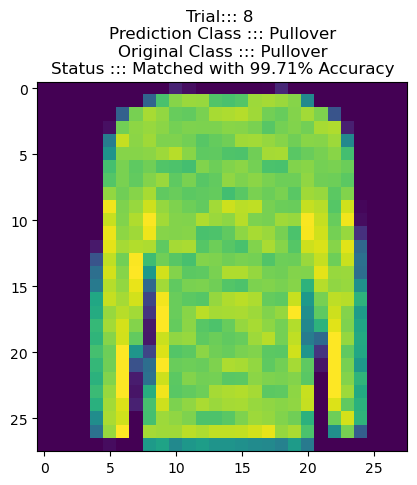

1/1 [==============================] - 0s 33ms/step


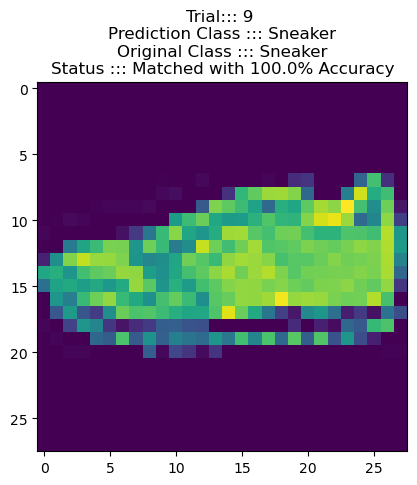

1/1 [==============================] - 0s 39ms/step


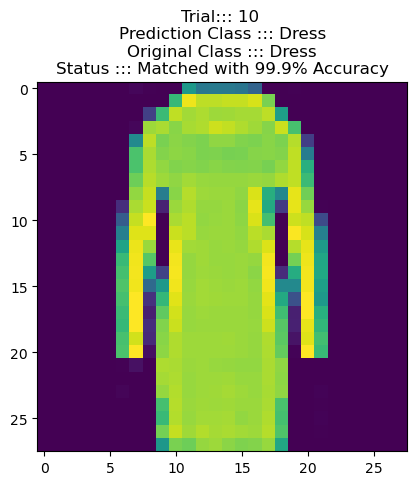

In [120]:
# Randomly Picking 10 test classes and predicting it
for i in range(1,11):
    maxrows = X_test_final.shape[0]

    random_row = random.randint(1, maxrows)

    test_prediction = X_test_final[random_row]
    actual_value = y_test[random_row]
    predictions = model.predict(test_prediction.reshape(-1, 28, 28, 1))
    predicted_class = np.argmax(predictions)
    max_probability = predictions[0, predicted_class]
    plt.imshow(test_prediction.reshape(28,28))
    plt.title(f'''Trial::: {i} 
Prediction Class ::: {labels_dict[predicted_class]}
Original Class ::: {labels_dict[actual_value]}
Status ::: {'Matched' if labels_dict[predicted_class] == labels_dict[actual_value] else 'Not Matched'} with {round(max_probability*100,2)}% Accuracy''')
    plt.show()

In [121]:
# END OF IMAGE CLASSIFICATION
# Assignment Submitted by VINAY M 14-09-2023